In [1]:
import glob
import pandas as pd
import numpy as np
from astropy.table import Table 
from astropy.stats import median_absolute_deviation

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

#Live dangerously
import warnings
warnings.filterwarnings("ignore")

In [15]:
#Colman's files
t = Table.read('ColmanTable_NGC6791.txt', format='ascii')


Text(0.5, 0, 'Millimag MMD')

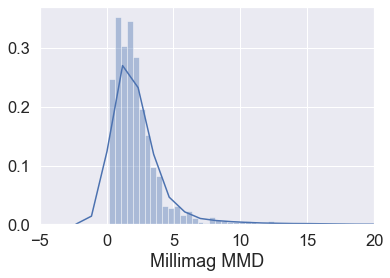

In [45]:
sns.distplot(t['mmd']*1000,label='Colman LCs',bins=250)
plt.xlim(-5,20)
plt.xlabel('Millimag MMD')


Text(0.5, 0, 'Millimag MMD')

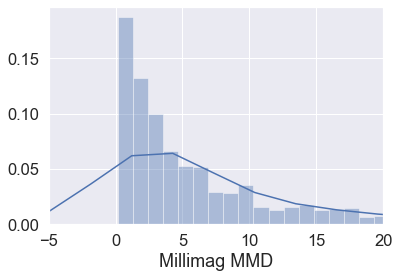

In [44]:
#My catalog files
dfK2 = pd.read_table('/Users/melinda/Dropbox/Research_K20/C0Catalog/C0Catalog.dat',delimiter=' ')
sns.distplot(dfK2.dmag*1000,bins=250,label='Soares-Furtado LCs',norm_hist=True)
plt.xlim(-5,20)
plt.xlabel('Millimag MMD')


In [49]:
#My TFA-corrected LCs
TFAfilesin=glob.glob('/Users/melinda/Dropbox/Research_K20/TFA_LC/*.tfalc') 
print('There are ',len(TFAfilesin),'total raw LC from my K2C0 research')
print('The first file is listed as: \n    ', TFAfilesin[0])
mmd_TFA=[]
for p in TFAfilesin:
    tmp=Table.read(p, format='ascii',names=['cad','time','raw','err','nTFA','x','y','TFA'])
    tmp2=(median_absolute_deviation(tmp['TFA'])*1000)
    mmd_TFA.append(tmp2)

There are  3960 total raw LC from my K2C0 research
The first file is listed as: 
     /Users/melinda/Dropbox/Research_K20/TFA_LC/HAT-264-0000089.rlc.tfalc


In [51]:
mmd_TFA[0:3]

[0.8899999999999999, 0.8899999999999999, 1.4500000000000002]

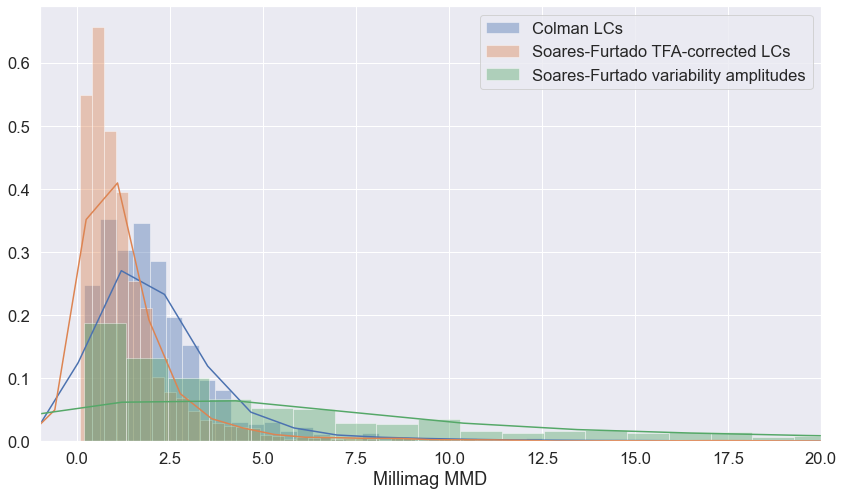

In [59]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5) 
sns.distplot(t['mmd']*1000,label='Colman LCs',bins=250)
sns.distplot(mmd_TFA,bins=250,label='Soares-Furtado TFA-corrected LCs')
sns.distplot(dfK2.dmag*1000,bins=250,label='Soares-Furtado variability amplitudes')
plt.xlim(-1,20)

plt.xlabel('Millimag MMD')
plt.legend()
plt.savefig('ColmanMMDComparison_all3.png',bbox_inches='tight')

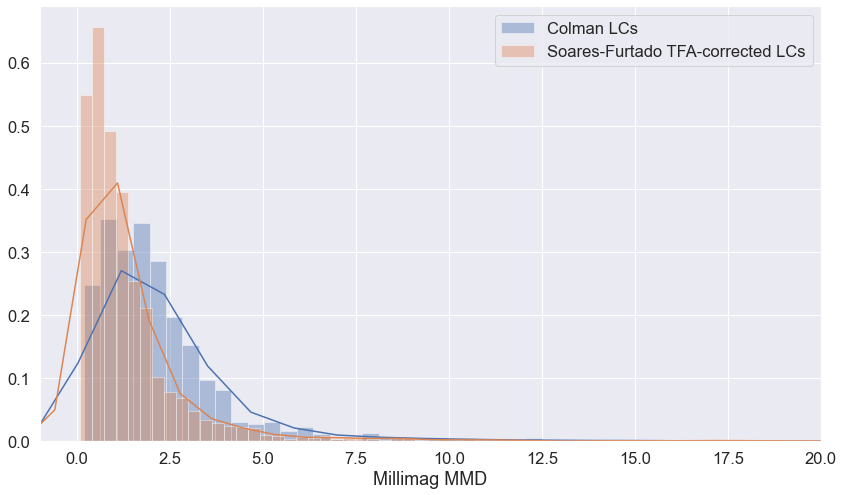

In [61]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5) 
sns.distplot(t['mmd']*1000,label='Colman LCs',bins=250)
sns.distplot(mmd_TFA,bins=250,label='Soares-Furtado TFA-corrected LCs')
plt.xlim(-1,20)

plt.xlabel('Millimag MMD')
plt.legend()
plt.savefig('ColmanMMDComparison_2methods.png',bbox_inches='tight')